# CIS 4526 Sp23 HomeWork 4

### classifying weather by taking pictures

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
# run the following if it is the first time
try:
    import cv2
except:
    os.system("pip install opencv-python")

In [3]:
import cv2

### The purpose of this homework is to give you a chance to practice what you have learned in using Convolution Neural Network 

***Make sure you have download the weather_data.zip file from Canvas and save it under a subfolder name data/weather_data***

In [4]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


weather_data = '/kaggle/input/weather-data/weather_data'

In [5]:
cloud_set = [
    '{}/{}'.format(weather_data,i) 
    for i in os.listdir(weather_data) 
    if 'cloudy' in i
]
rain_set = [
    '{}/{}'.format(weather_data,i) 
    for i in os.listdir(weather_data) 
    if 'rain' in i
]
sunrise_set = [
    '{}/{}'.format(weather_data,i) 
    for i in os.listdir(weather_data) 
    if 'sunrise' in i
]
sunshine_set = [
    '{}/{}'.format(weather_data,i) 
    for i in os.listdir(weather_data) 
    if 'shine' in i
]

In [6]:
cloud_set

['/kaggle/input/weather-data/weather_data/cloudy88.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy167.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy78.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy80.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy2.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy89.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy99.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy256.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy9.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy185.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy208.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy44.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy269.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy102.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy20.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy30.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy71.jpg',
 '/kaggle/input/weather-dat

In [7]:
# Randomly Shuffle the order of the images files
random.shuffle(cloud_set)
random.shuffle(rain_set)
random.shuffle(sunrise_set)
random.shuffle(sunshine_set)

In [8]:
cloud_set

['/kaggle/input/weather-data/weather_data/cloudy100.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy51.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy194.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy166.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy176.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy271.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy71.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy219.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy14.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy139.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy170.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy267.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy264.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy167.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy24.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy245.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy207.jpg',
 '/kaggle/input/we

In [9]:
# Now randomly split the image files into a training set and a testing set
train_set = cloud_set[:150] + rain_set[:150] + sunrise_set[:150] + sunshine_set[:150]
test_set = cloud_set[150:] + rain_set[150:] + sunrise_set[:150] + sunshine_set[:150]

In [10]:
train_set

['/kaggle/input/weather-data/weather_data/cloudy100.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy51.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy194.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy166.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy176.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy271.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy71.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy219.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy14.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy139.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy170.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy267.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy264.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy167.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy24.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy245.jpg',
 '/kaggle/input/weather-data/weather_data/cloudy207.jpg',
 '/kaggle/input/we

In [11]:
# define a few parameters
n_rows = 150
n_cols = 150
channels = 3 # RBG

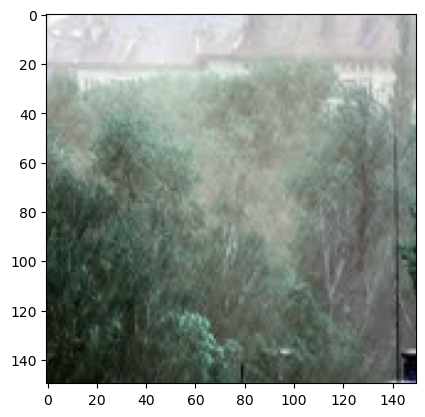

In [12]:
# Display some images
idx = 200
#image = train_set[idx]
image = f"{weather_data}/rain140.jpg"
cv2.imread(image, cv2.IMREAD_COLOR)
img = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

In [13]:
# Create the X_train, X_test, y_train, y_test
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_train.append(1)
        elif 'rain' in image:
            y_train.append(2)
        elif 'sunrise' in image:
            y_train.append(3)
        elif 'shine' in image:
            y_train.append(4)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (n_rows, n_cols), interpolation=cv2.INTER_CUBIC))
        if 'cloudy' in image:
            y_test.append(1)
        elif 'rain' in image:
            y_test.append(2)
        elif 'sunrise' in image:
            y_test.append(3)
        elif 'shine' in image:
            y_test.append(4)
    except Exception:
        print('Failed to format: ', image)

Failed to format:  /kaggle/input/weather-data/weather_data/shine131.jpg
Failed to format:  /kaggle/input/weather-data/weather_data/shine131.jpg


<AxesSubplot:xlabel='y_train', ylabel='count'>

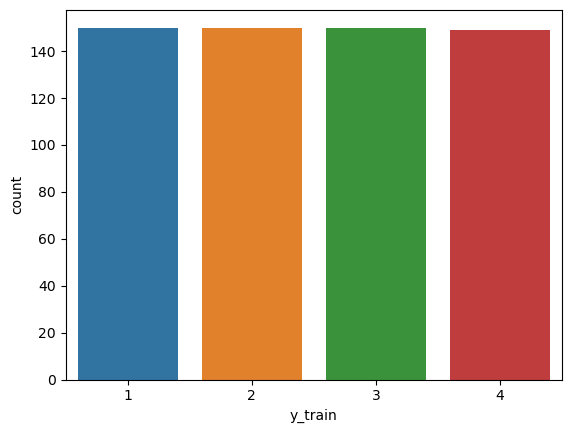

In [14]:
# sns.countplot(y_train)
sns.countplot(x='y_train',data=pd.DataFrame({'y_train':y_train}))

In [15]:
# Convert to Numpy Arrays and Switch Targets to Categorical
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

[0. 1. 0. 0. 0.]


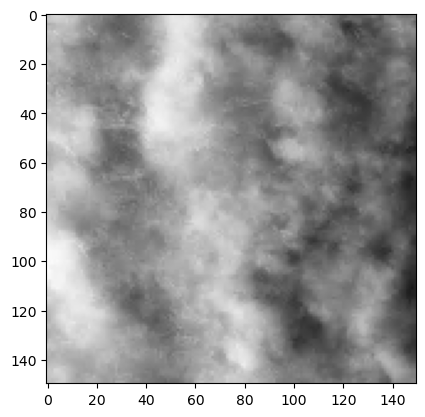

In [16]:
# display some X_test, y_test
idx = 1
#idx = 435
print(y_test[idx])
plt.imshow(X_test[idx])

### Now finally we have the data setup and we can build some classification model using CNN

### Make sure your work include the following steps

* Define, Compile and Run one CNN model
* Plot the learning curve
* Try a few different different network structure by varying the number of hidden nodes and with and without Dropout
* Try two different Dropout percentage
* Comment on your result, in particular if the Dropout helps or not

***Type your code here***

In [17]:
import tensorflow as tf
import os
import numpy as np
import random

SEED = 4000

#Function to initialize seeds for all libraries which might have stochastic behavior
def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)

# Activate Tensorflow deterministic behavior
def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)

In [18]:
# Define your model here

# ...
# 13.) Model Summary
# define a small convent

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers

inputs = layers.Input(shape=(150, 150, 3))
# for color images, may need to scale and normalize the inputs
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Dropout(.5)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)
print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856 

### Hint if you convert your y label using one-hot encoding, then use categorical_crossentropy instead of sparse_categorical_crossentropy, you may want to use Dense(5, ...) as your last output layer

In [19]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((599, 150, 150, 3), (599, 5), (513, 150, 150, 3), (513, 5))

# 14.) Compile and Train the Model
* model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
* history = model.fit(X_train, y_train, validation_data=(X_test, y_test), ....)

In [20]:
from tensorflow.keras import metrics

dir(metrics)

['AUC',
 'Accuracy',
 'BinaryAccuracy',
 'BinaryCrossentropy',
 'BinaryIoU',
 'CategoricalAccuracy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'FalseNegatives',
 'FalsePositives',
 'Hinge',
 'IoU',
 'KLD',
 'KLDivergence',
 'LogCoshError',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'Mean',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanIoU',
 'MeanMetricWrapper',
 'MeanRelativeError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'MeanTensor',
 'Metric',
 'OneHotIoU',
 'OneHotMeanIoU',
 'Poisson',
 'Precision',
 'PrecisionAtRecall',
 'Recall',
 'RecallAtPrecision',
 'RootMeanSquaredError',
 'SensitivityAtSpecificity',
 'SparseCategoricalAccuracy',
 'SparseCategoricalCrossentropy',
 'SparseTopKCategoricalAccuracy',
 'SpecificityAtSensitivity',
 'SquaredHinge',
 'Sum',
 'TopKCategoricalAccuracy',
 'TrueNegatives',
 'TruePositives',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

filepath = '/kaggle/working/with_dropout.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

metrics = ['Recall','Precision','accuracy']
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics,)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100


2023-04-30 01:56:17.340680: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - ETA: 0s - loss: 190.8602 - recall: 0.4301 - precision: 0.4301 - accuracy: 0.4301
Epoch 1: accuracy improved from inf to 0.43006, saving model to /kaggle/working/with_dropout.hdf5
8/8 [==============================] - 9s 149ms/step - loss: 190.8602 - recall: 0.4301 - precision: 0.4301 - accuracy: 0.4301 - val_loss: 1.6981 - val_recall: 0.9750 - val_precision: 0.9750 - val_accuracy: 0.9750
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 5.9049 - recall: 0.6180 - precision: 0.6205 - accuracy: 0.6180
Epoch 2: accuracy did not improve from 0.43006
8/8 [==============================] - 0s 53ms/step - loss: 5.9049 - recall: 0.6180 - precision: 0.6205 - accuracy: 0.6180 - val_loss: 10.3650 - val_recall: 0.0417 - val_precision: 0.0439 - val_accuracy: 0.0500
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 1.1456 - recall: 0.5625 - precision: 0.8428 - accuracy: 0.7344
Epoch 3: accuracy did not improve from 0.43006
8/8 

### Plot learning Curves

***Type your code here***

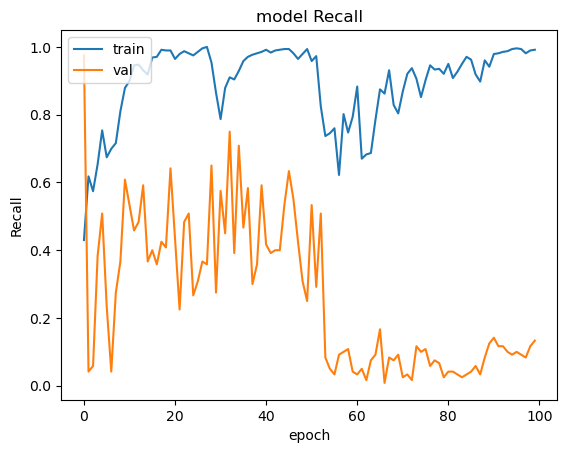

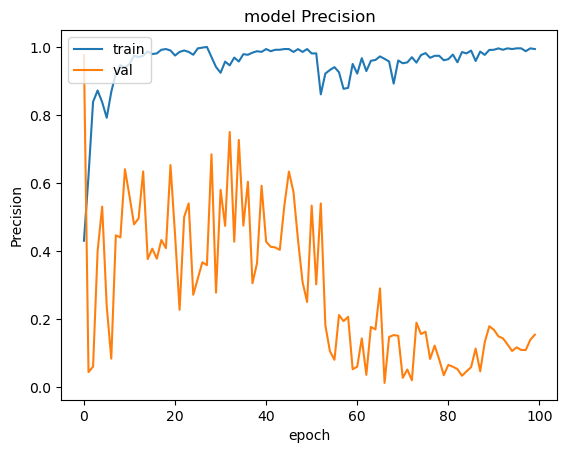

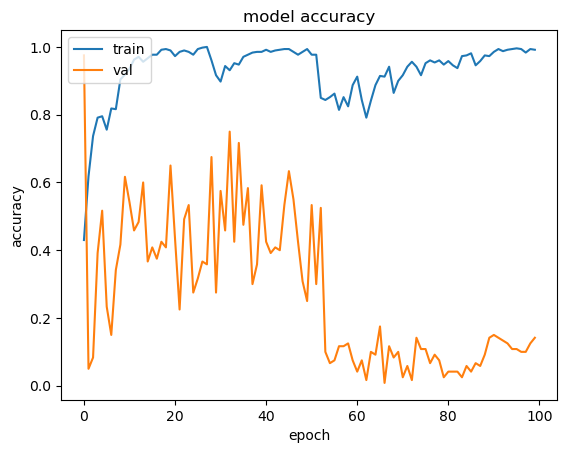

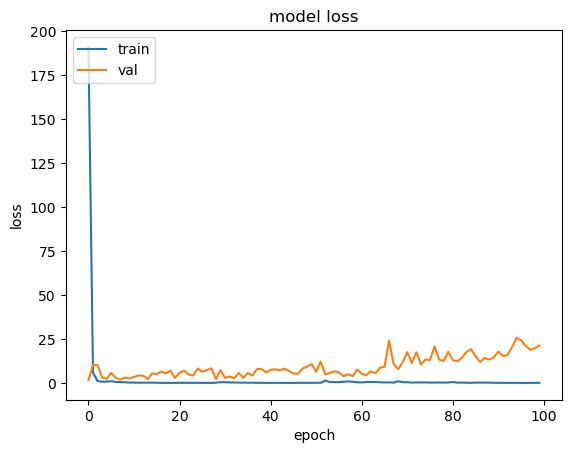

In [22]:
# Plot Accuracy Over Training Period
import matplotlib.pyplot as plt

for metric in metrics+['loss']:
    plt.plot(history.history[metric.lower()])
    plt.plot(history.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [23]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")


17/17 [==============================] - 1s 10ms/step - loss: 9.0081 - recall: 0.5634 - precision: 0.5634 - accuracy: 0.5634
Test accuracy: 0.563
Test recall: 0.563
Test precision: 0.563


### Vanilla dropout 0.2

In [24]:
# Define your model here

# ...
# 13.) Model Summary
# define a small convent

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers

inputs = layers.Input(shape=(150, 150, 3))
# for color images, may need to scale and normalize the inputs
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Dropout(.2)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       7385

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

filepath = '/kaggle/working/with_dropout_2.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

metrics = ['Recall','Precision','accuracy']
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics,)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100


2023-04-30 01:57:43.004340: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


7/8 [=========================>....] - ETA: 0s - loss: 287.9581 - recall: 0.3996 - precision: 0.4004 - accuracy: 0.4018
Epoch 1: accuracy improved from inf to 0.40919, saving model to /kaggle/working/with_dropout_2.hdf5
8/8 [==============================] - 2s 96ms/step - loss: 271.4998 - recall: 0.4071 - precision: 0.4079 - accuracy: 0.4092 - val_loss: 4.6697 - val_recall: 0.6250 - val_precision: 0.6250 - val_accuracy: 0.6250
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 6.3069 - recall: 0.6161 - precision: 0.6374 - accuracy: 0.6317
Epoch 2: accuracy did not improve from 0.40919
8/8 [==============================] - 0s 52ms/step - loss: 5.9686 - recall: 0.5971 - precision: 0.6384 - accuracy: 0.6221 - val_loss: 5.6653 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.0167
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 0.9728 - recall: 0.5938 - precision: 0.7710 - accuracy: 0.7009
Epoch 3: accuracy did not improve from 0.40

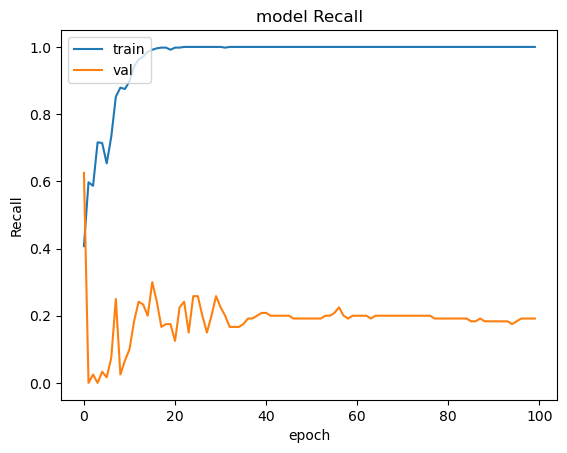

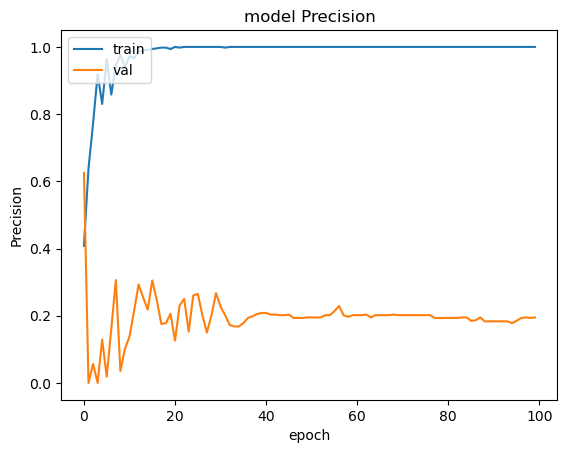

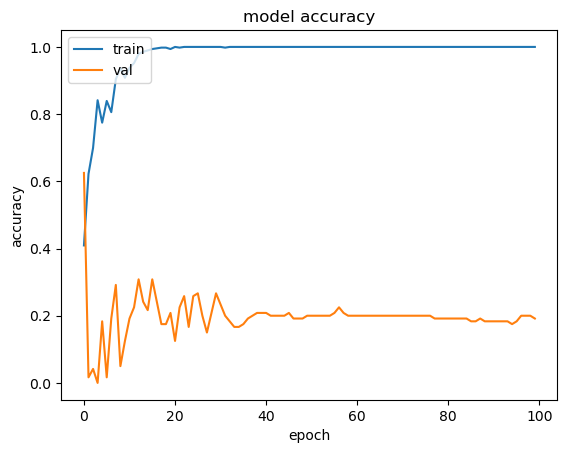

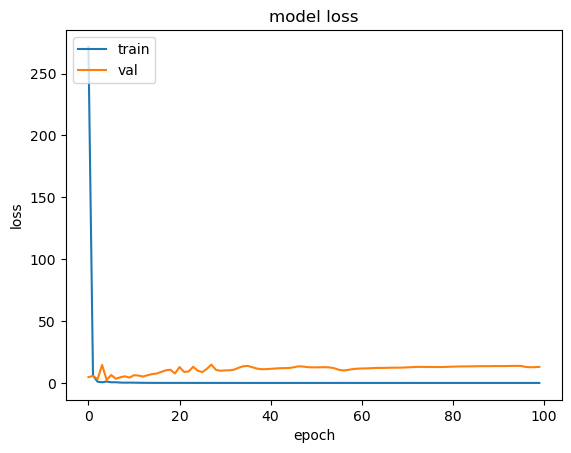

In [26]:
# Plot Accuracy Over Training Period
import matplotlib.pyplot as plt

for metric in metrics+['loss']:
    plt.plot(history.history[metric.lower()])
    plt.plot(history.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

### Evaluating the model out-of-sample

In [27]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")


17/17 [==============================] - 0s 8ms/step - loss: 6.9281 - recall: 0.7251 - precision: 0.7251 - accuracy: 0.7251
Test accuracy: 0.725
Test recall: 0.725
Test precision: 0.725


### Vanilla dropout 0.8

In [28]:
# Define your model here

# ...
# 13.) Model Summary
# define a small convent

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers

inputs = layers.Input(shape=(150, 150, 3))
# for color images, may need to scale and normalize the inputs
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Dropout(.8)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model = Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       7385

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

filepath = '/kaggle/working/with_dropout_8.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

metrics = ['Recall','Precision','accuracy']
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics,)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100


2023-04-30 01:58:30.352373: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


7/8 [=========================>....] - ETA: 0s - loss: 94.2570 - recall: 0.4866 - precision: 0.4877 - accuracy: 0.4866 
Epoch 1: accuracy improved from inf to 0.49478, saving model to /kaggle/working/with_dropout_8.hdf5
8/8 [==============================] - 2s 101ms/step - loss: 88.9155 - recall: 0.4948 - precision: 0.4958 - accuracy: 0.4948 - val_loss: 64.6623 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 5.8131 - recall: 0.7121 - precision: 0.7136 - accuracy: 0.7121
Epoch 2: accuracy did not improve from 0.49478
8/8 [==============================] - 0s 52ms/step - loss: 5.5591 - recall: 0.7098 - precision: 0.7128 - accuracy: 0.7098 - val_loss: 8.9988 - val_recall: 0.1833 - val_precision: 0.1864 - val_accuracy: 0.1917
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 1.6305 - recall: 0.6920 - precision: 0.7617 - accuracy: 0.7277
Epoch 3: accuracy did not improve from

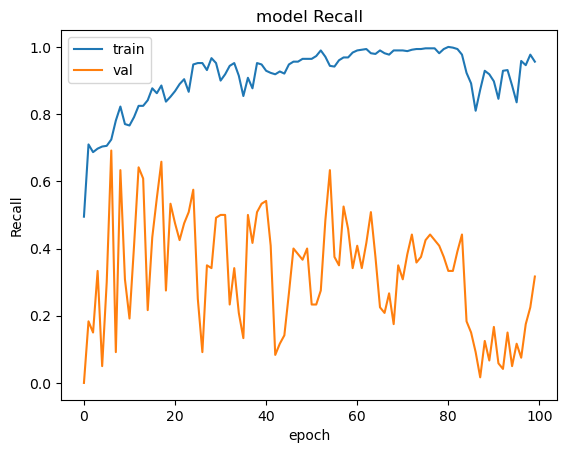

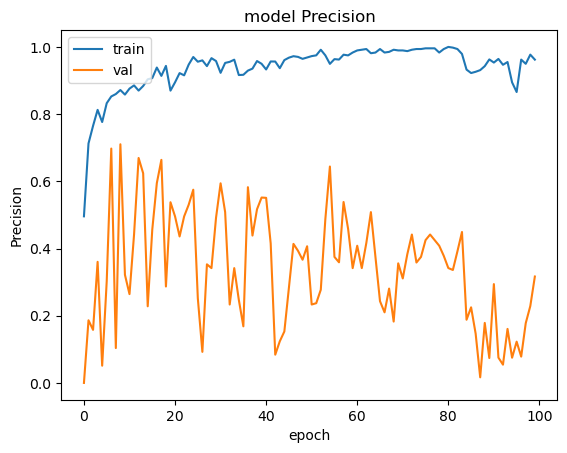

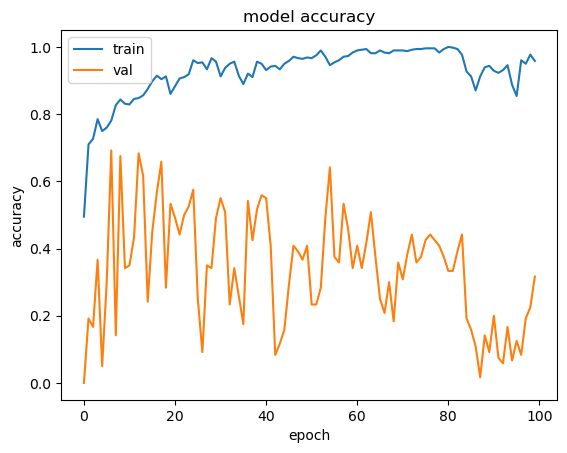

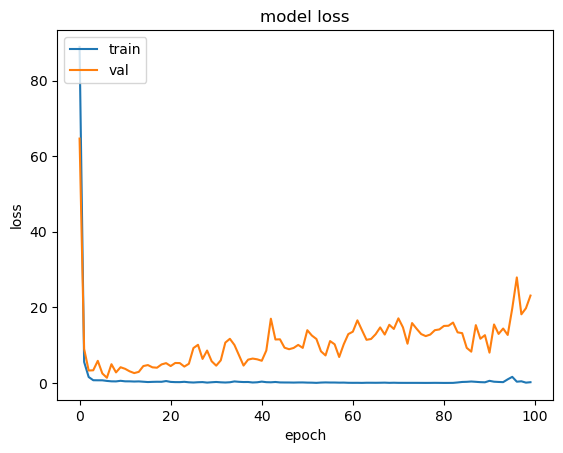

In [30]:
# Plot Accuracy Over Training Period
import matplotlib.pyplot as plt

for metric in metrics+['loss']:
    plt.plot(history.history[metric.lower()])
    plt.plot(history.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [31]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 0s 7ms/step - loss: 23.7087 - recall: 0.4659 - precision: 0.4659 - accuracy: 0.4659
Test accuracy: 0.466
Test recall: 0.466
Test precision: 0.466


### Model 1 with No dropout


In [32]:
# for color images, may need to scale and normalize the inputs
inputs = layers.Input(shape=(150, 150, 3))
# x = layers.Rescaling(1./255)(inputs)
# x = layers.BatchNormalization()(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=32, kernel_size=3, activation="relu")(x)
# x = layers.Dropout(.5)(x)
x = Flatten()(x)
outputs = Dense(units=5, activation="softmax")(x)
model1 = Model(inputs=inputs, outputs=outputs)
print(model1.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 32)        1846

In [33]:
filepath = '/kaggle/working/without_dropout.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model1.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history1 = model1.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 68.9038 - recall: 0.2756 - precision: 0.2762 - accuracy: 0.2756
Epoch 1: accuracy improved from inf to 0.27557, saving model to /kaggle/working/without_dropout.hdf5
8/8 [==============================] - 4s 234ms/step - loss: 68.9038 - recall: 0.2756 - precision: 0.2762 - accuracy: 0.2756 - val_loss: 44.9120 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 3.5809 - recall: 0.4821 - precision: 0.5791 - accuracy: 0.5491
Epoch 2: accuracy did not improve from 0.27557
8/8 [==============================] - 1s 67ms/step - loss: 3.4488 - recall: 0.4676 - precision: 0.5788 - accuracy: 0.5449 - val_loss: 1.1197 - val_recall: 0.2833 - val_precision: 0.7391 - val_accuracy: 0.5583
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 1.1392 - recall: 0.2835 - precision: 0.7888 - accuracy: 0.5379
Epoch 3: accuracy did not 

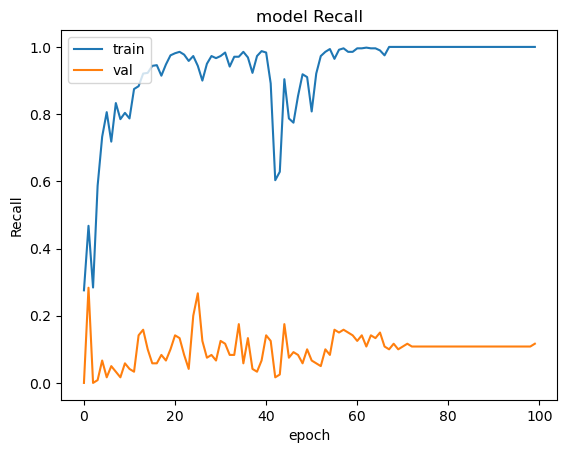

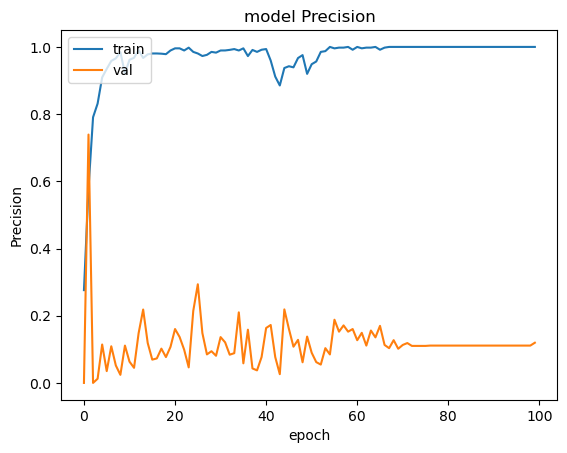

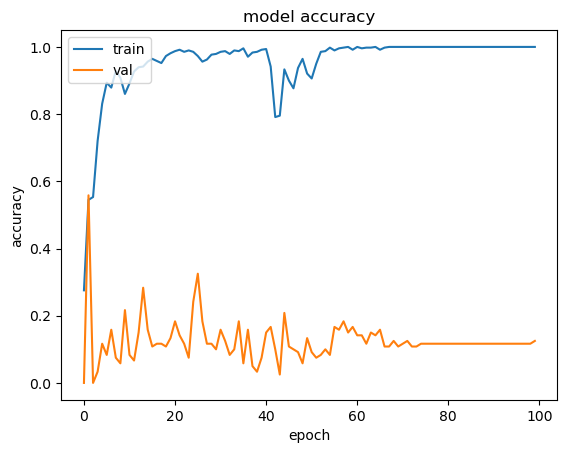

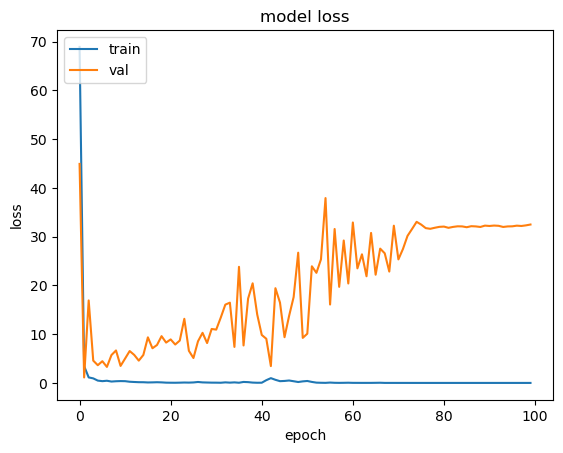

In [34]:
for metric in metrics+['loss']:
    plt.plot(history1.history[metric.lower()])
    plt.plot(history1.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [35]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 1s 12ms/step - loss: 18.6008 - recall: 0.2788 - precision: 0.2788 - accuracy: 0.2788
Test accuracy: 0.279
Test recall: 0.279
Test precision: 0.279


### Try transfer learning with pretrained VGG with dropout 0.5

In [36]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152, Xception,VGG19,EfficientNetB4

input_shape = (150,150,3)
num_classes = 5
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in vgg_model.layers:
    layer.trainable = False
    
x = layers.Dropout(.5)(vgg_model.output)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model_vgg = Model(inputs=vgg_model.input, outputs=x)
model_vgg.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                            

In [37]:
filepath = '/kaggle/working/vgg_dropout.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model_vgg.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history_vgg = model_vgg.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100


2023-04-30 02:00:45.261672: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_4/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - ETA: 0s - loss: 4.6597 - recall: 0.7599 - precision: 0.7615 - accuracy: 0.7599
Epoch 1: accuracy improved from inf to 0.75992, saving model to /kaggle/working/vgg_dropout.hdf5
8/8 [==============================] - 10s 822ms/step - loss: 4.6597 - recall: 0.7599 - precision: 0.7615 - accuracy: 0.7599 - val_loss: 5.6904 - val_recall: 0.7250 - val_precision: 0.7250 - val_accuracy: 0.7250
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 0.5236 - recall: 0.9520 - precision: 0.9520 - accuracy: 0.9520
Epoch 2: accuracy did not improve from 0.75992
8/8 [==============================] - 2s 203ms/step - loss: 0.5236 - recall: 0.9520 - precision: 0.9520 - accuracy: 0.9520 - val_loss: 10.6749 - val_recall: 0.5333 - val_precision: 0.5378 - val_accuracy: 0.5333
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.1442 - recall: 0.9875 - precision: 0.9875 - accuracy: 0.9875
Epoch 3: accuracy did not improve from 0.75992
8/8 [==

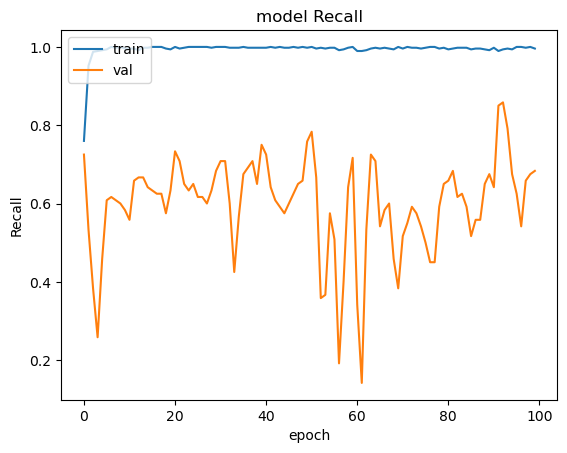

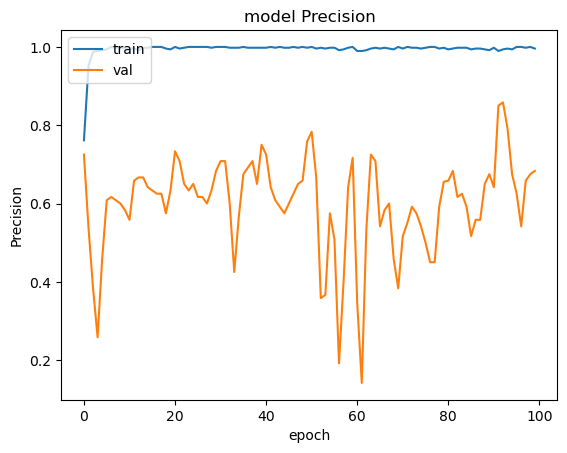

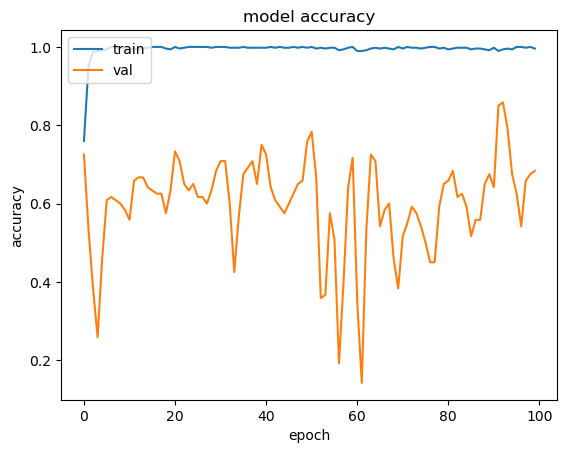

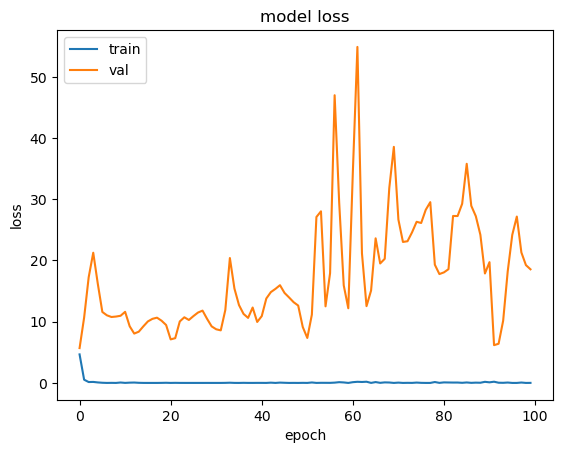

In [38]:
for metric in metrics+['loss']:
    plt.plot(history_vgg.history[metric.lower()])
    plt.plot(history_vgg.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [39]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 3s 87ms/step - loss: 2.0645 - recall: 0.8558 - precision: 0.8558 - accuracy: 0.8558
Test accuracy: 0.856
Test recall: 0.856
Test precision: 0.856


### VGG without dropout

In [40]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152, Xception,VGG19,EfficientNetB4

input_shape = (150,150,3)
num_classes = 5
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in vgg_model.layers:
    layer.trainable = False
    
x = Flatten()(vgg_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

model_vgg = Model(inputs=vgg_model.input, outputs=x)
model_vgg.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [41]:
filepath = '/kaggle/working/vgg_without_dropout.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model_vgg.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history_vgg = model_vgg.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2,callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 2.9269 - recall: 0.7620 - precision: 0.7684 - accuracy: 0.7683
Epoch 1: accuracy improved from inf to 0.76827, saving model to /kaggle/working/vgg_without_dropout.hdf5
8/8 [==============================] - 3s 261ms/step - loss: 2.9269 - recall: 0.7620 - precision: 0.7684 - accuracy: 0.7683 - val_loss: 15.4952 - val_recall: 0.2917 - val_precision: 0.2917 - val_accuracy: 0.2917
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 0.3031 - recall: 0.9854 - precision: 0.9854 - accuracy: 0.9854
Epoch 2: accuracy did not improve from 0.76827
8/8 [==============================] - 1s 185ms/step - loss: 0.3031 - recall: 0.9854 - precision: 0.9854 - accuracy: 0.9854 - val_loss: 16.4678 - val_recall: 0.4333 - val_precision: 0.4333 - val_accuracy: 0.4333
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.0730 - recall: 0.9896 - precision: 0.9896 - accuracy: 0.9896
Epoch 3: accuracy did not improve 

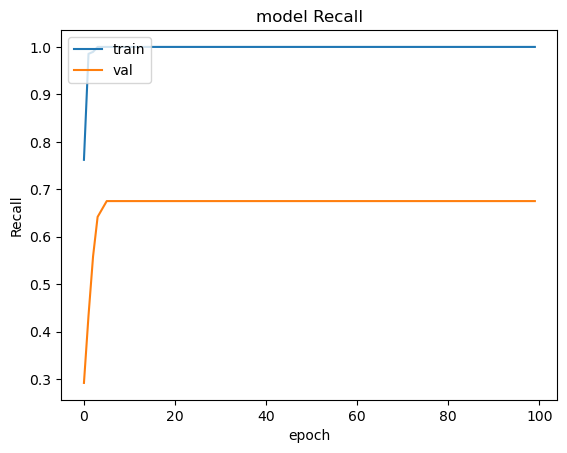

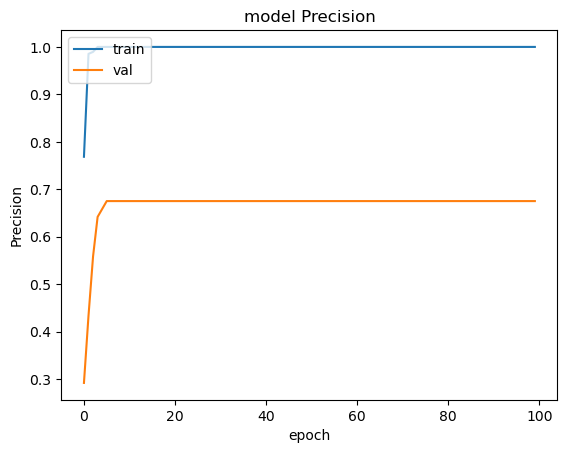

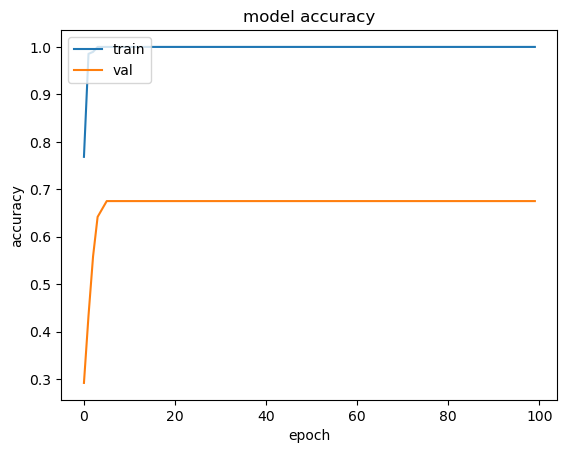

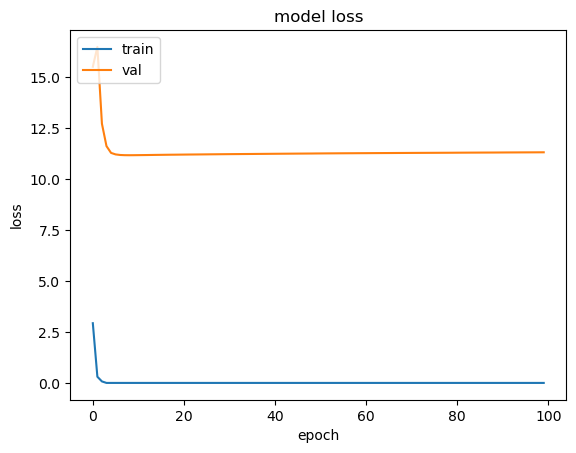

In [42]:
for metric in metrics+['loss']:
    plt.plot(history_vgg.history[metric.lower()])
    plt.plot(history_vgg.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [43]:
# Type your code here
model = load_model(filepath)
test_loss, test_re,test_pr,test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 2s 77ms/step - loss: 4.0921 - recall: 0.8031 - precision: 0.8047 - accuracy: 0.8031
Test accuracy: 0.803
Test recall: 0.803
Test precision: 0.805


### VGG no dropout, no early stopping

In [44]:
model_vgg.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=metrics)

history_vgg = model_vgg.fit(X_train, y_train, epochs=100, batch_size=64, validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 3s 236ms/step - loss: 1.2393e-07 - recall: 1.0000 - precision: 1.0000 - accuracy: 1.0000 - val_loss: 13.4219 - val_recall: 0.6417 - val_precision: 0.6417 - val_accuracy: 0.6417
Epoch 2/100
8/8 [==============================] - 1s 185ms/step - loss: 5.0590e-07 - recall: 1.0000 - precision: 1.0000 - accuracy: 1.0000 - val_loss: 7.9953 - val_recall: 0.7333 - val_precision: 0.7333 - val_accuracy: 0.7333
Epoch 3/100
8/8 [==============================] - 1s 185ms/step - loss: 0.0801 - recall: 0.9916 - precision: 0.9916 - accuracy: 0.9916 - val_loss: 55.9371 - val_recall: 0.1000 - val_precision: 0.1000 - val_accuracy: 0.1000
Epoch 4/100
8/8 [==============================] - 1s 184ms/step - loss: 0.0302 - recall: 0.9979 - precision: 0.9979 - accuracy: 0.9979 - val_loss: 17.5713 - val_recall: 0.5667 - val_precision: 0.5667 - val_accuracy: 0.5667
Epoch 5/100
8/8 [==============================] - 1s 184ms/step - loss: 0.0247 - recall: 0.9958 

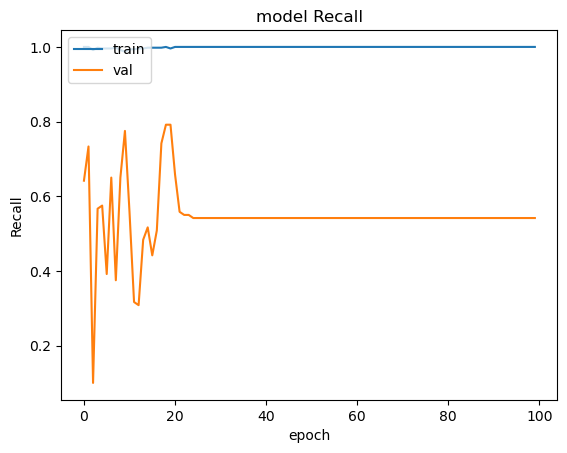

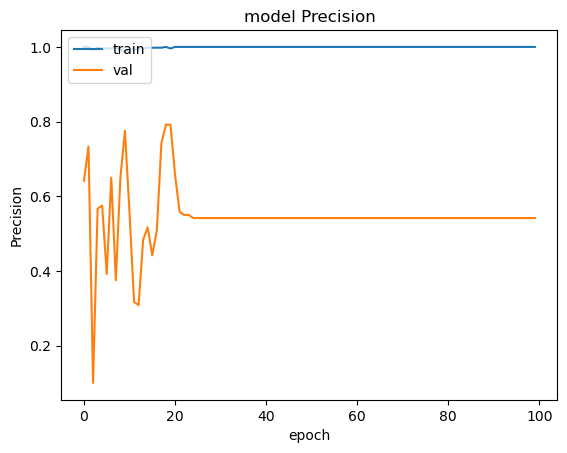

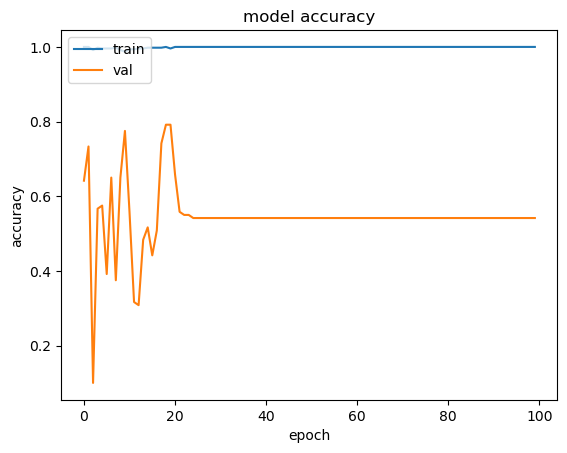

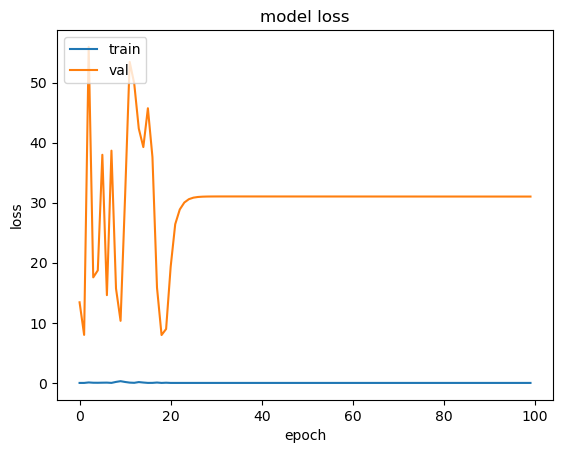

In [45]:
for metric in metrics+['loss']:
    plt.plot(history_vgg.history[metric.lower()])
    plt.plot(history_vgg.history["val_"+metric.lower()])
    plt.title(f'model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [46]:
# Type your code here
test_loss, test_re,test_pr,test_acc = model_vgg.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test recall: {test_re:.3f}")
print(f"Test precision: {test_pr:.3f}")

17/17 [==============================] - 1s 78ms/step - loss: 7.7243 - recall: 0.8850 - precision: 0.8850 - accuracy: 0.8850
Test accuracy: 0.885
Test recall: 0.885
Test precision: 0.885


### Comment on your results

On the topic of the effects of dropout as a regularizing component to the fitted model, it is not apparant that dropout has any overall beneficial effect to model performance on out of sample data. Dropout does seem to counter the effects of overfitting as visualized in the Vanilla loss callbacks as the loss callback curves progress relatively in sync. Contrary to Machine learning community conventional beliefs, my anecdotal experiments here seems to indicate that mitigating overfitting in models have no beneficial effects to performance on out of sample data but actually detrimental effects. The less regularizing effects to counter overfitting, the higher the model performance on out of sample data.